In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [12]:
# Load datasets
customers = pd.read_csv('C:\Data-Science-Assignment-eCommerce-Transactions-Dataset\Dataset\Customers .csv')
products = pd.read_csv('C:\Data-Science-Assignment-eCommerce-Transactions-Dataset\Dataset\Products.csv')
transactions = pd.read_csv('C:\Data-Science-Assignment-eCommerce-Transactions-Dataset\Dataset\Transactions.csv')

In [13]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [14]:
## Dataset Information
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

## Checking for Missing Values

In [15]:
print(customers.isnull().sum(), "\n")

print(products.isnull().sum(), "\n")

print(transactions.isnull().sum(), "\n")

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



### From the above Insight we can see there is no Missing value in the datasets

In [16]:
## Checking for Duplicate Values
print("Duplicates in Customers dataset:", customers.duplicated().sum())
print("Duplicates in Products dataset:", products.duplicated().sum())
print("Duplicates in Transactions dataset:", transactions.duplicated().sum())

Duplicates in Customers dataset: 0
Duplicates in Products dataset: 0
Duplicates in Transactions dataset: 0


### There is no duplicate in the above dataset

C:\Users\amitk\AppData\Local\Temp\ipykernel_24992\2257743269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_transactions, x='Region', y='TotalValue', palette='viridis')


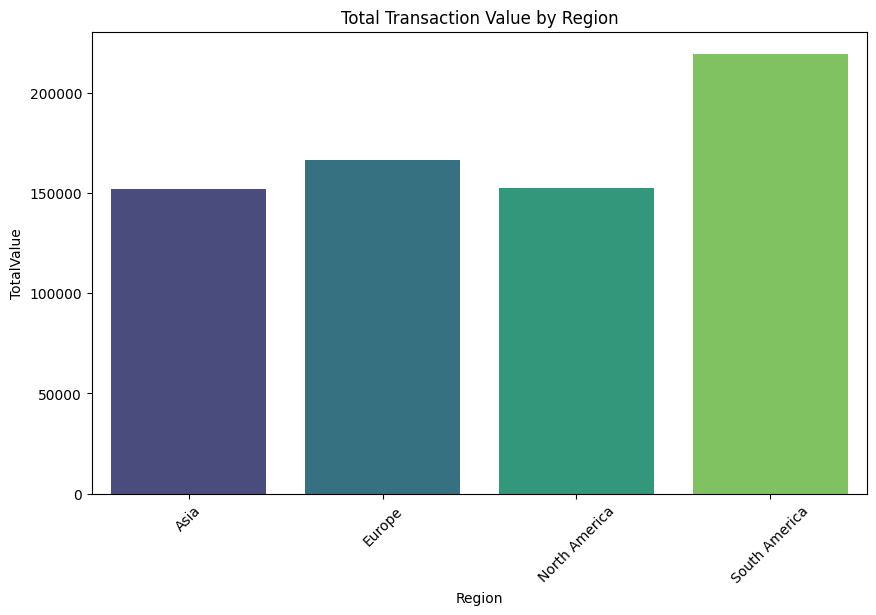

In [22]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
region_transactions = merged_data.groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_transactions, x='Region', y='TotalValue', palette='viridis')
plt.title('Total Transaction Value by Region')
plt.xticks(rotation=45)
plt.show()

### Insight
1. South America Has done the higher number of transactions followed by Europe and asia

## Merging the whole dataset

In [23]:
# Merge Customers and Transactions on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Merge with Products on ProductID
final_data = pd.merge(merged_data, products, on='ProductID')

print(final_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [24]:
# 1. Most Popular Product Category:

popular_category = final_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("Most Popular Product Categories:\n", popular_category)

Most Popular Product Categories:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


### Most Number of Product is Books and Least number is Clothing

C:\Users\amitk\AppData\Local\Temp\ipykernel_24992\1608319317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_df, x='TotalQuantity', y='ProductName', palette='magma')


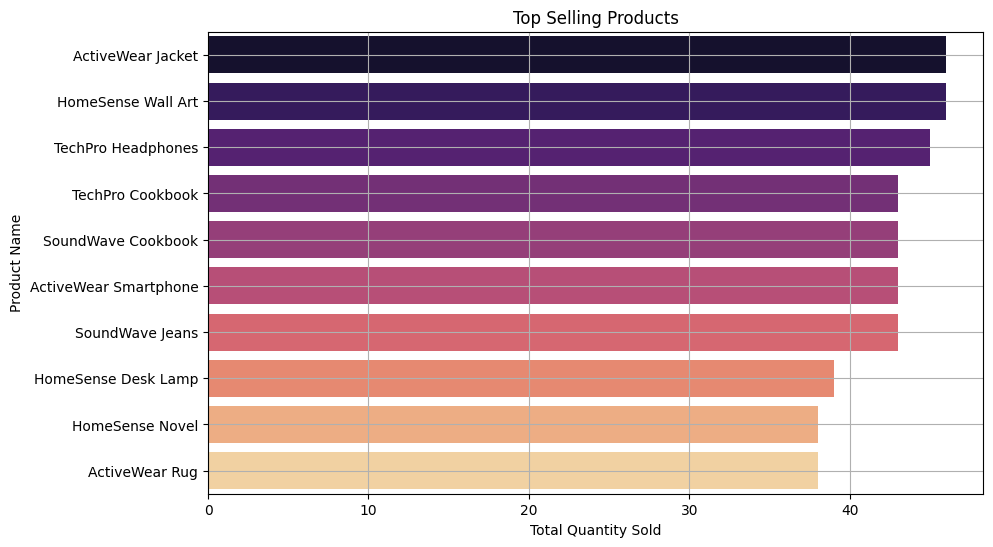

In [26]:
op_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
top_product_names = products[products['ProductID'].isin(top_products.index)]['ProductName']
top_products_df = pd.DataFrame({'ProductName': top_product_names, 'TotalQuantity': top_products.values})

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_df, x='TotalQuantity', y='ProductName', palette='magma')
plt.title('Top Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.grid()
plt.show()

## Most Selling Product is Activewear Jacket andHomeSense Wall Art

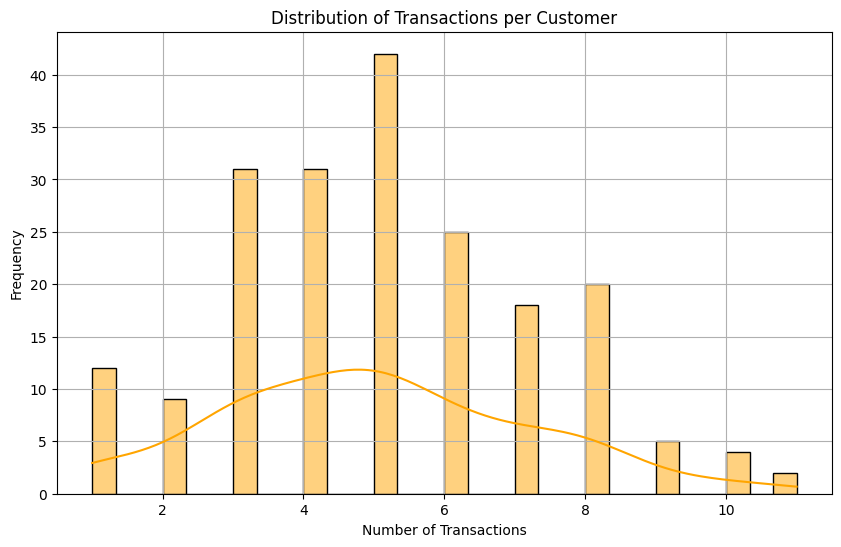

In [34]:
customer_transactions = transactions.groupby('CustomerID')['TransactionID'].count()
plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions, bins=30, kde=True, color='orange')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [41]:
# Top-selling products
top_products = [transactions.groupby('ProductID')['TotalValue'].sum().nlargest(15)]
print("Top 10 Selling Products by Revenue:")
print(top_products)

Top 10 Selling Products by Revenue:
[ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
P075    12941.76
P086    12780.30
P050    12254.20
P017    12214.02
P094    12078.18
Name: TotalValue, dtype: float64]


#### From the above Insight we are finging the Top 15 Selling Product

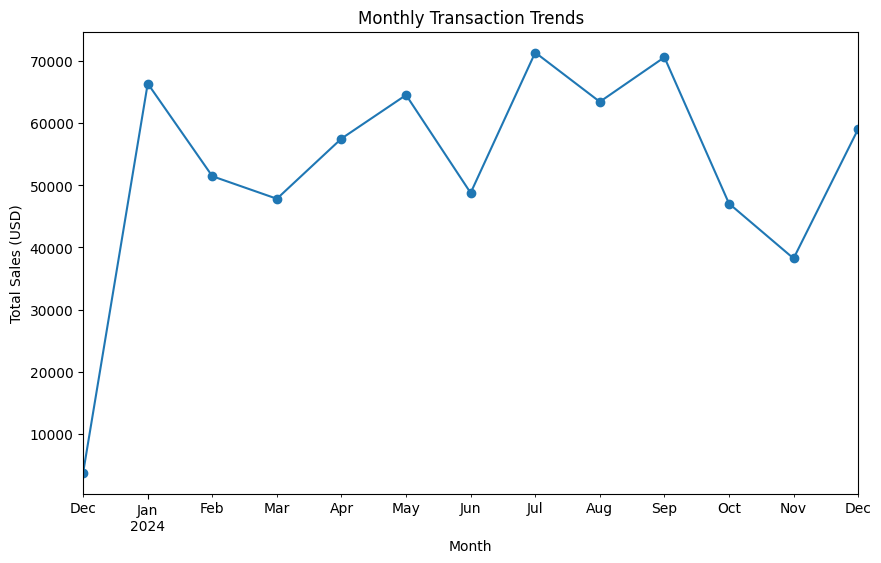

In [47]:
### Monthly transaction trends
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot transaction trends
monthly_sales.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

### From the Abobe Insight we can find that August having highest number of sales and Nov having Least

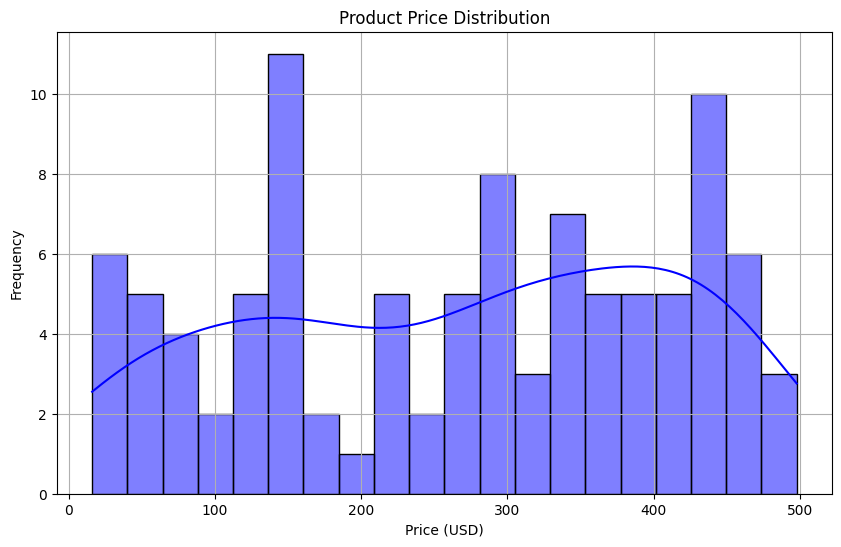

In [49]:
## Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid()
plt.show()